In [0]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/My Drive/datasetratingfinal.csv')

In [0]:
df['id_trajet'] =pd.Series(range(1,1177540))

In [0]:
df

,Unnamed: 0,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,traffic,route,securite,accident,comfort,rating,id_trajet
0,243462,74337,KENITRA,34.264570,-6.570169,AGADIR,30.422037,-9.559509,601.177000,168.32956,2018,7,20,Friday,23,45,21,Saturday,5,19,5,34,1,Voiture,2,national,0,1,0,0,1
1,132267,64156,MEKNES,42.651545,-1.309065,AGADIR,30.422037,-9.559509,699.790001,209.93700,2018,8,3,Friday,18,28,4,Saturday,13,59,19,31,22,autocar,2,autoroute,1,1,0,1,2
2,507014,38640,FES,34.034653,-5.016193,NADOR,35.051918,-2.824399,303.835000,85.07380,2019,2,4,Monday,11,12,4,Monday,14,34,3,22,3,Voiture,1,autoroute,1,0,1,3,3
3,50783,34244,MEKNES,42.651545,-1.309065,MOHAMMADIA,33.695838,-7.389329,215.394001,53.84850,2018,4,23,Monday,23,6,24,Tuesday,1,14,2,8,3,Voiture,1,national,0,0,0,1,4
4,47186,98100,KENITRA,34.264570,-6.570169,MARRAKECH,31.625826,-7.989161,377.624000,105.73472,2019,1,12,Saturday,23,4,13,Sunday,2,38,3,34,3,Voiture,2,national,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177534,611064,83934,TANGER,35.777103,-5.803792,BERRECHID,33.267675,-7.581147,376.530999,75.30620,2019,2,15,Friday,22,3,16,Saturday,1,41,3,38,4,Voiture,1,national,0,0,0,1,1177535
1177535,287137,96096,BENI MELLAL,32.334193,-6.353335,OUARZAZATE,30.920193,-6.910923,299.602000,83.88856,2018,9,18,Tuesday,10,6,18,Tuesday,14,41,4,35,3,Voiture,0,national,1,0,0,2,1177536
1177536,356497,98729,CASABLANCA,33.595063,-7.618777,MOHAMMADIA,33.695838,-7.389329,30.024001,8.40672,2018,11,21,Wednesday,7,31,21,Wednesday,8,1,0,30,2,Voiture,1,national,1,0,1,3,1177537
1177537,99991,80519,MEKNES,42.651545,-1.309065,NADOR,35.051918,-2.824399,361.040000,108.31200,2019,3,16,Saturday,21,15,17,Sunday,8,30,11,15,28,autocar,2,national,1,1,0,1,1177538


In [0]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [0]:
df

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,traffic,route,securite,accident,comfort,rating,id_trajet
0,74337,KENITRA,34.264570,-6.570169,AGADIR,30.422037,-9.559509,601.177000,168.32956,2018,7,20,Friday,23,45,21,Saturday,5,19,5,34,1,Voiture,2,national,0,1,0,0,1
1,64156,MEKNES,42.651545,-1.309065,AGADIR,30.422037,-9.559509,699.790001,209.93700,2018,8,3,Friday,18,28,4,Saturday,13,59,19,31,22,autocar,2,autoroute,1,1,0,1,2
2,38640,FES,34.034653,-5.016193,NADOR,35.051918,-2.824399,303.835000,85.07380,2019,2,4,Monday,11,12,4,Monday,14,34,3,22,3,Voiture,1,autoroute,1,0,1,3,3
3,34244,MEKNES,42.651545,-1.309065,MOHAMMADIA,33.695838,-7.389329,215.394001,53.84850,2018,4,23,Monday,23,6,24,Tuesday,1,14,2,8,3,Voiture,1,national,0,0,0,1,4
4,98100,KENITRA,34.264570,-6.570169,MARRAKECH,31.625826,-7.989161,377.624000,105.73472,2019,1,12,Saturday,23,4,13,Sunday,2,38,3,34,3,Voiture,2,national,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177534,83934,TANGER,35.777103,-5.803792,BERRECHID,33.267675,-7.581147,376.530999,75.30620,2019,2,15,Friday,22,3,16,Saturday,1,41,3,38,4,Voiture,1,national,0,0,0,1,1177535
1177535,96096,BENI MELLAL,32.334193,-6.353335,OUARZAZATE,30.920193,-6.910923,299.602000,83.88856,2018,9,18,Tuesday,10,6,18,Tuesday,14,41,4,35,3,Voiture,0,national,1,0,0,2,1177536
1177536,98729,CASABLANCA,33.595063,-7.618777,MOHAMMADIA,33.695838,-7.389329,30.024001,8.40672,2018,11,21,Wednesday,7,31,21,Wednesday,8,1,0,30,2,Voiture,1,national,1,0,1,3,1177537
1177537,80519,MEKNES,42.651545,-1.309065,NADOR,35.051918,-2.824399,361.040000,108.31200,2019,3,16,Saturday,21,15,17,Sunday,8,30,11,15,28,autocar,2,national,1,1,0,1,1177538


In [0]:
count = df['Id_User'].value_counts()
print(count)

99336    2369
69227    2074
96745    1806
86291    1719
86778    1714
         ... 
95829     164
85353     164
76867     159
94472     147
58771     141
Name: Id_User, Length: 1954, dtype: int64


In [0]:
#extract the categorial featuers
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Ville de depart,Ville d'arrivée,weekday_name_dep,weekday_name_arr,Moyen_de_transport,route
0,KENITRA,AGADIR,Friday,Saturday,Voiture,national
1,MEKNES,AGADIR,Friday,Saturday,autocar,autoroute
2,FES,NADOR,Monday,Monday,Voiture,autoroute
3,MEKNES,MOHAMMADIA,Monday,Tuesday,Voiture,national
4,KENITRA,MARRAKECH,Saturday,Sunday,Voiture,national


In [0]:
df.drop(['id_trajet','Ville de depart',"Ville d'arrivée",'traffic','securite','accident','comfort'],axis=1,inplace=True)

In [0]:
df1=pd.get_dummies(df, columns=["weekday_name_dep","weekday_name_arr","Moyen_de_transport",'route'], prefix=["week_dep","week_arr","transport",'route'])

In [0]:
df2=df1[['Id_User','Latitude','Longitude','Latitude.1','Longitude.1','Distance','prix','Year_dep','Month_dep','day_dep','Hour_dep','minute_dep','day_arr','Hour_arr','minute_arr','hour_duree','minute_duree','nombre_place','week_dep_Friday','week_dep_Monday','week_dep_Saturday','week_dep_Sunday','week_dep_Thursday','week_dep_Tuesday','week_dep_Wednesday','week_arr_Friday','week_arr_Monday','week_arr_Saturday','week_arr_Sunday','week_arr_Thursday','week_arr_Tuesday','week_arr_Wednesday','transport_CTM','transport_Voiture','transport_autocar','route_autoroute','route_national','rating']]

In [0]:
df2

,Id_User,Latitude,Longitude,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,Hour_dep,minute_dep,day_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,week_dep_Friday,week_dep_Monday,week_dep_Saturday,week_dep_Sunday,week_dep_Thursday,week_dep_Tuesday,week_dep_Wednesday,week_arr_Friday,week_arr_Monday,week_arr_Saturday,week_arr_Sunday,week_arr_Thursday,week_arr_Tuesday,week_arr_Wednesday,transport_CTM,transport_Voiture,transport_autocar,route_autoroute,route_national,rating
0,74337,34.264570,-6.570169,30.422037,-9.559509,601.177000,168.32956,2018,7,20,23,45,21,5,19,5,34,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,64156,42.651545,-1.309065,30.422037,-9.559509,699.790001,209.93700,2018,8,3,18,28,4,13,59,19,31,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
2,38640,34.034653,-5.016193,35.051918,-2.824399,303.835000,85.07380,2019,2,4,11,12,4,14,34,3,22,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,3
3,34244,42.651545,-1.309065,33.695838,-7.389329,215.394001,53.84850,2018,4,23,23,6,24,1,14,2,8,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,98100,34.264570,-6.570169,31.625826,-7.989161,377.624000,105.73472,2019,1,12,23,4,13,2,38,3,34,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177534,83934,35.777103,-5.803792,33.267675,-7.581147,376.530999,75.30620,2019,2,15,22,3,16,1,41,3,38,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
1177535,96096,32.334193,-6.353335,30.920193,-6.910923,299.602000,83.88856,2018,9,18,10,6,18,14,41,4,35,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2
1177536,98729,33.595063,-7.618777,33.695838,-7.389329,30.024001,8.40672,2018,11,21,7,31,21,8,1,0,30,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,3
1177537,80519,42.651545,-1.309065,35.051918,-2.824399,361.040000,108.31200,2019,3,16,21,15,17,8,30,11,15,28,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [0]:
X = df2.iloc[:,0:37].values
y = df2.iloc[:,37].values
print('The independent features set: ')
print(X[:,0:37])

The independent features set: 
[[ 7.43370000e+04  3.42645700e+01 -6.57016900e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 6.41560000e+04  4.26515447e+01 -1.30906530e+00 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 3.86400000e+04  3.40346534e+01 -5.01619260e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 9.87290000e+04  3.35950627e+01 -7.61877680e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.05190000e+04  4.26515447e+01 -1.30906530e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 9.06010000e+04  3.57771030e+01 -5.80379200e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]


In [0]:
import keras
import keras.utils
y=keras.utils.to_categorical(y, num_classes=None, dtype='float32')
y

Using TensorFlow backend.


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [0]:
X_scale

array([[0.73173868, 0.05585892, 0.02980151, ..., 0.        , 0.        ,
        1.        ],
       [0.62530187, 0.17572948, 0.07892202, ..., 1.        , 1.        ,
        0.        ],
       [0.35854599, 0.05257284, 0.04431027, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.98674375, 0.04629001, 0.02001114, ..., 0.        , 0.        ,
        1.        ],
       [0.79636812, 0.17572948, 0.07892202, ..., 1.        , 0.        ,
        1.        ],
       [0.90176994, 0.07747675, 0.03695682, ..., 0.        , 1.        ,
        0.        ]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [0]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(824277, 37) (176631, 37) (176631, 37) (824277, 5) (176631, 5) (176631, 5)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import Activation
from keras.layers import Dropout 
from keras import regularizers

In [0]:
model = Sequential()
#First Hidden Layer
model.add(layers.Dense(18,input_dim=37, use_bias=False,kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Second  Hidden Layer
model.add(layers.Dense(18, use_bias=False,kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Output Layer
model.add(Dense(5,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [0]:
model.compile(optimizer='sgd',              loss='categorical_crossentropy',              metrics=['accuracy'])

In [0]:
hist = model.fit(X_train, Y_train,          batch_size=32, epochs=100,          validation_data=(X_val, Y_val))

Train on 824277 samples, validate on 176631 samples
Epoch 1/100
824277/824277 [==============================] - 43s 52us/step - loss: 0.7407 - accuracy: 0.7426 - val_loss: 0.5814 - val_accuracy: 0.7920
Epoch 2/100
824277/824277 [==============================] - 43s 52us/step - loss: 0.5897 - accuracy: 0.7822 - val_loss: 0.5635 - val_accuracy: 0.7952
Epoch 3/100
824277/824277 [==============================] - 43s 52us/step - loss: 0.5707 - accuracy: 0.7886 - val_loss: 0.5832 - val_accuracy: 0.7666
Epoch 4/100
824277/824277 [==============================] - 43s 52us/step - loss: 0.5563 - accuracy: 0.7930 - val_loss: 0.5404 - val_accuracy: 0.8005
Epoch 5/100
824277/824277 [==============================] - 44s 54us/step - loss: 0.5492 - accuracy: 0.7945 - val_loss: 0.5705 - val_accuracy: 0.7897
Epoch 6/100
824277/824277 [==============================] - 43s 52us/step - loss: 0.5457 - accuracy: 0.7950 - val_loss: 0.5082 - val_accuracy: 0.8115
Epoch 7/100
824277/824277 [===============

In [0]:
model.evaluate(X_test, Y_test)[1]

176631/176631 [==============================] - 4s 20us/step


0.7962701916694641

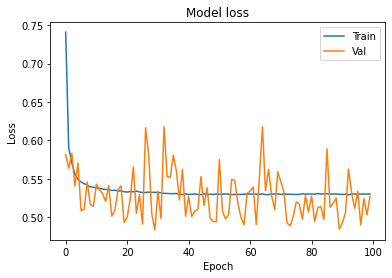

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

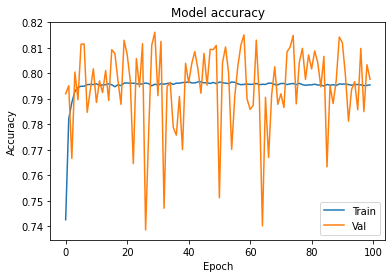

In [0]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
y_pred=model.predict(X_test)

In [0]:
ypred=np.argmax(y_pred, axis=1)


In [0]:
Ytest=np.argmax(Y_test, axis=1)

In [0]:
from sklearn.metrics import confusion_matrix 
cf_matrix = confusion_matrix (Ytest, ypred) 
print (cf_matrix)

[[36845   232     0     0     0]
 [ 6781 34403   738    83     0]
 [  381 10844 26368  4681   197]
 [   10   324  4138 25148  3094]
 [    0     2    12  4468 17882]]


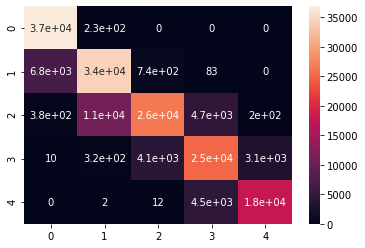

In [0]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


0 4


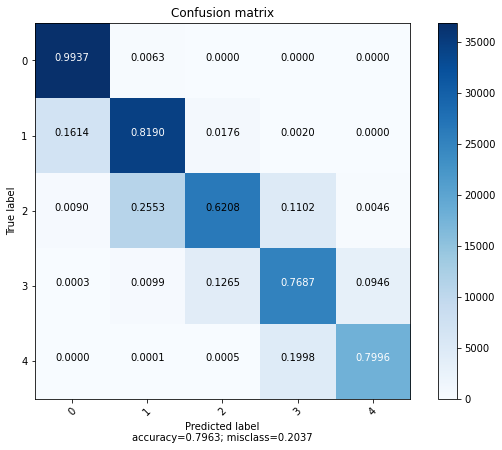

In [0]:
import itertools 
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
print(y_pred.min(),y_pred.max())
cm = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cm,range(Y_test.min(),Y_test.max()+1),normalize=True)

In [2]:
trajet_ratings = df2.groupby('id_trajet').size()
trajet_popularity = df2.groupby('id_trajet')['rating'].sum().sort_values(ascending=False).reset_index()
trajet_popularity = pd.merge(trajet_popularity, trajet_ratings, how='inner', on=['id_trajet'])
trajet_popularity = pd.merge(trajet_popularity, trajet[['id_trajet','Ville de depart',"Ville d'arrivée",'Distance','prix','weekday_name_dep','Hour_dep','minute_dep','day_arr','weekday_name_arr','Hour_arr','minute_arr','Moyen_de_transport','route']], how='inner', on=['id_trajet'])
trajet_popularity = trajet_popularity.sort_values(by=['rating'], ascending=False)
trajet_popularity

NameError: ignored